<a href="https://colab.research.google.com/github/ftcelepcikay/Convolutional-Neural-Networks-in-TensorFlow-/blob/master/Exercise_8_SignLanguage_CSVread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [0]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        this_csv_reader = csv.reader(training_file, delimiter=",")
        header = next(this_csv_reader)
        #print(header)
        labels=[]
        images=[]
        for line in this_csv_reader:
            label=line[0]
            data=line[1:785]
            image=np.array(data).reshape((28, 28))
            labels.append(label)
            images.append(image)
          # Your code starts here
          # Your code ends here
        images = np.array(images).astype(float)
        labels = np.array(labels).astype(float)
        return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images,axis=3)

# Create an ImageDataGenerator and do Image Augmentation
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,)

train_generator = training_datagen.flow(training_images, training_labels)

validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow(testing_images, testing_labels)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(
    train_generator, epochs=10, steps_per_epoch=27455/32, 
    validation_data = validation_generator, verbose = 1, validation_steps=7172/32)

model.evaluate(testing_images, testing_labels, verbose=0)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
858/857 [==============================] - 10s 11ms/step - loss: 2.0796 - accuracy: 0.3625 - val_loss: 0.8943 - val_accuracy: 0.6761
Epoch 2/10
858/857 [==============================] - 9s 11ms/step - loss: 1.0309 - accuracy: 0.6622 - val_loss: 0.3092 - val_accuracy: 0.8878
Epoch 3/10
858/857 [==============================] - 9s 11ms/step - loss: 0.6749 - accuracy: 0.7746 - val_loss: 0.1428 - val_accuracy: 0.9610
Epoch 4/10
858/857 [==============================] - 9s 11ms/step - loss: 0.5134 - accuracy: 0.8306 - val_loss: 0.0867 - val_accuracy: 0.9859
Epoch 5/10
858/857 [==============================] - 9s 11ms/step - loss: 0.4161 - accuracy: 0.8613 - val_loss: 0.0447 - val_accuracy: 0.9937
Epoch 6/10
858/857 [==============================] - 9s 11ms/step - loss: 0.3529 - accuracy: 0.8832 - val_loss: 0.0374 - val_accuracy: 0.9939
Epoch 7/10
858/857 [==============================] - 9s 11ms/ste

[6.92426086682151, 0.56609035]

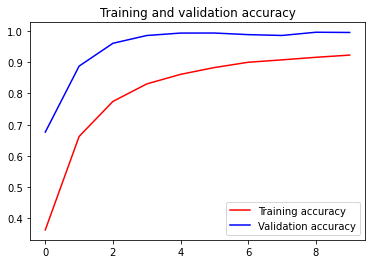

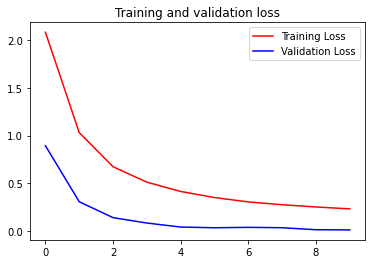

In [0]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()